## Customer Churn Prediction Using Kaggle Dataset derived from IBM's Cognos Analytics Samples

In this project, we are going to build a model to predict the likelihood of customer churn through various characteristics such as demographic information, account information and services information. There are 19 columns in the dataset and the 'Churn' column represents whether the customer has let go of the service or not. 'Yes' corresponds to service left.

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('/Users/jebranirshad/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
for column in df.columns:
    print('Column: {} - Unique Values: {}'. format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

We can see that the 'Total Charges' column has wrongly been detected as an Object. We will have to change it to a numeric data type.

In [42]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [43]:
# We will now check for missing values in our dataset
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [44]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [45]:
# Given that the tenure of the columns that are missing are 0, we can drop the null values.
df.dropna(inplace=True)

In [46]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [47]:
df = df.drop('customerID', axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
# While seeing the unique values, we noticed that there are entries which contain parenthesis we will have to remove

df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

## Exploratory Data Analysis

Text(0, 0.5, 'Proportion of Observations')

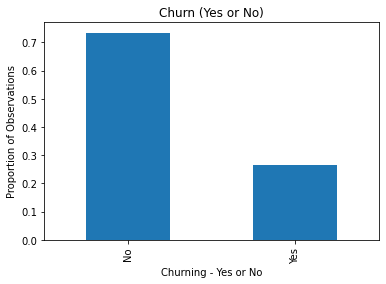

In [49]:
churn_values = df['Churn'].value_counts(normalize=True)
churn_values.plot(kind='bar')

plt.title('Churn (Yes or No)')
plt.xlabel('Churning - Yes or No')
plt.ylabel('Proportion of Observations')

We can observe that we have an imbalanced dataset, with 'No' being the majority class. While modelling this would lead to a large number of false negatives.

Next we will plot a percentage-based stacked bar plot to see how 'Churn' varies across the independent variables in our dataset. We will plot it for three sets of variables:
1. Demographic Information
2. Customer Account Information
3. Services information
4. Numerical Customer Account Information

In [50]:
import math
def percentage_stacked_plot(columns_to_plot, super_title):
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22)

    for index, column in enumerate(columns_to_plot, 1):

        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True)

        ax.legend(loc="upper right", title='Churn')

        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

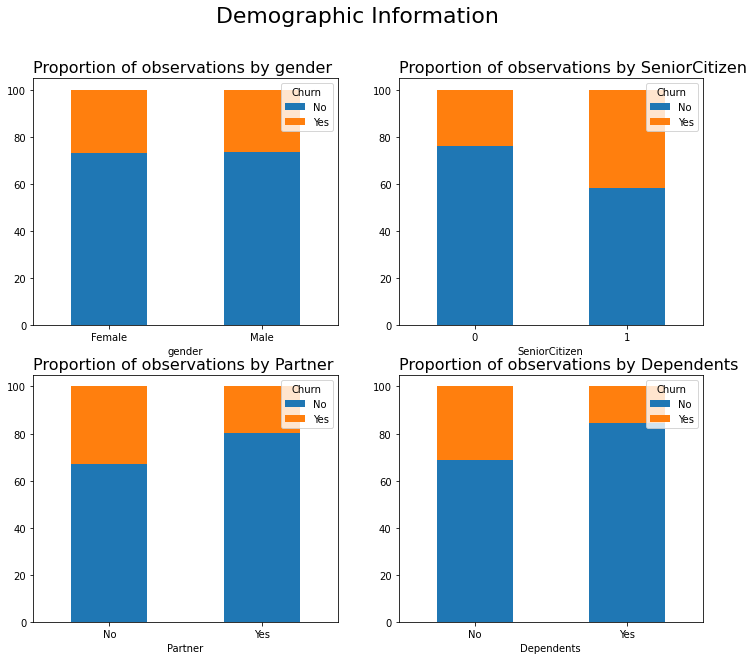

In [51]:
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
percentage_stacked_plot(demographic_columns, 'Demographic Information')

From the above plots, we observe the following:
1. Gender does not have any significant predictive power.
2. The churn rate of senior citizens exceeds those of younger citizens almost twice over.
3. Customers with a partner churn less than customers without.
4. Customers with dependents churn less that customers without.

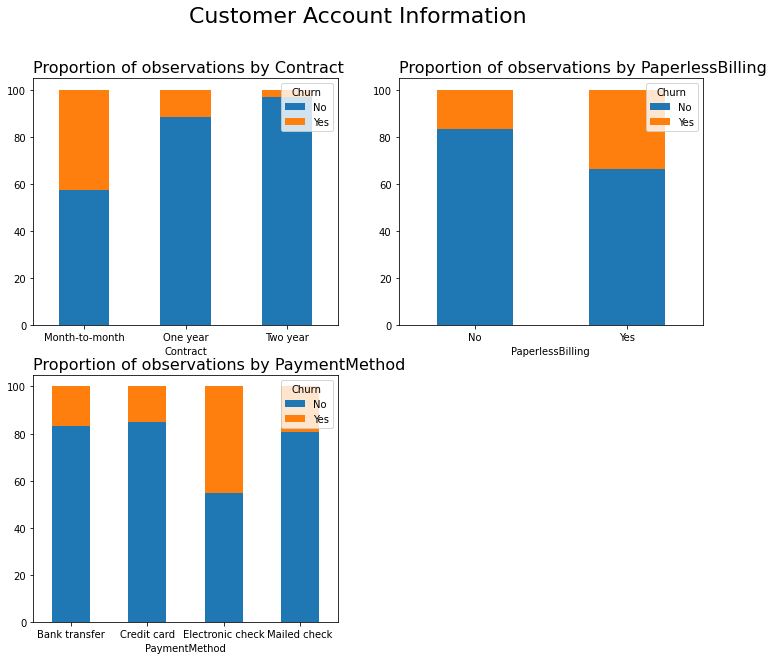

In [52]:
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']
percentage_stacked_plot(account_columns, 'Customer Account Information')

From the above plots, we observe the following:
1. Customers with month-to-month contracts have higher churn rates as opposed to the other two contract options.
2. Customers with paperless billing have a higher churn rate.
3. Customers who pay with electronic check have a higher churn rate.

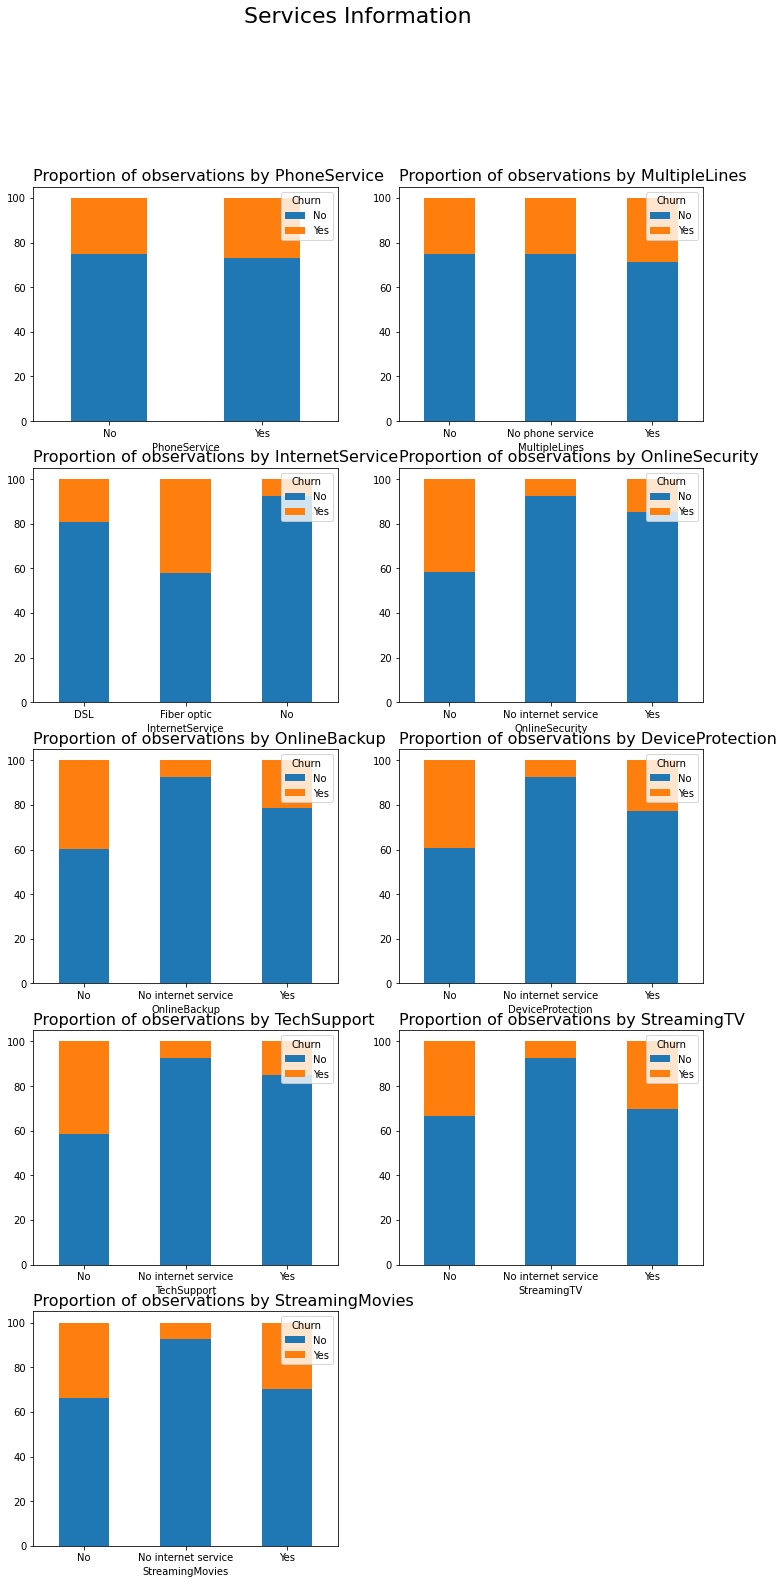

In [53]:
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

percentage_stacked_plot(services_columns, 'Services Information')

From the above graphs, we can observe that Phone Service and Multiple Lines do not provide any predictive power.

In [54]:
def histogram_plots(columns_to_plot, super_title):
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22,  y=.95)

    for index, column in enumerate(columns_to_plot, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, alpha=0.5, label='No')
        df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True, alpha=0.5, label='Yes')

        ax.legend(loc="upper right", title='Churn')

        ax.set_title('Distribution of ' + column + ' by churn', fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

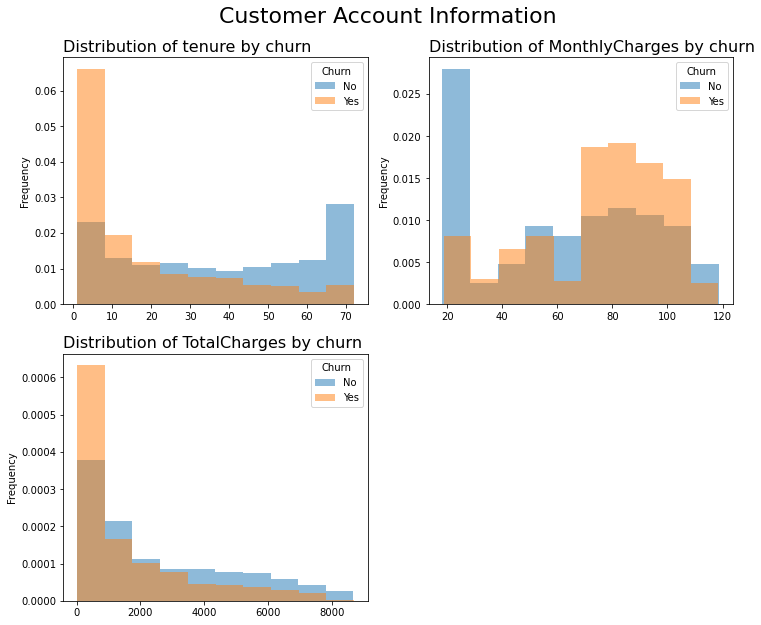

In [55]:
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

histogram_plots(account_columns_numeric, 'Customer Account Information')

From the above plots, we can observe the following:
1. New Customers i.e Customers with lower tenure, are more likely to churn.
2. The churn rate tends to be higher when the Monthly Charges are higher.
3. Clients with low total charges are more likely to churn.

We will now drop Gender, Phone Service and Multiple lines from our dataset given that they do not provide useful information for predicting churn.

In [56]:
df = df.drop(['gender', 'PhoneService', 'MultipleLines'], axis=1)
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Feature Engineering

In [57]:
df_transformed = df.copy()

label_encoding_columns = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn']

for column in label_encoding_columns:
    if column == 'gender':
        df_transformed[column] = df_transformed[column].map({'Female': 1, 'Male': 0})
    else:
        df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0})

df_transformed.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0
4,0,0,0,2,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [58]:
one_hot_encoding_columns = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)
df_transformed.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,1,29.85,29.85,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,0,56.95,1889.50,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,53.85,108.15,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,42.30,1840.75,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,70.70,151.65,1,0,1,...,1,0,0,1,0,0,0,0,1,0


## Data Normalization

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_transformed[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df_transformed[['tenure', 'MonthlyCharges', 'TotalCharges']])
df_transformed.head()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.000000,1,0.115423,0.001275,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0.464789,0,0.385075,0.215867,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0.014085,1,0.354229,0.010310,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0.619718,0,0.239303,0.210241,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0.014085,1,0.521891,0.015330,1,0,1,...,1,0,0,1,0,0,0,0,1,0


## Prediction

In [75]:
X = df_transformed.drop('Churn', axis= 1)
y = df_transformed['Churn']

In [83]:
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

def predict(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)
    model.fit(X_train, y_train)
    print("Accuracy is", model.score(X_test, y_test)*100)
    score = cross_val_score(model, X, y, cv = 10)
    print("Cross validation is",np.mean(score)*100)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
predict(model, X, y)

Accuracy is 76.16609783845279
Cross validation is 75.95271482607009


In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
predict(model, X, y)

Accuracy is 79.29465301478953
Cross validation is 80.27582681365575


In [80]:
from sklearn.svm import SVC
model = SVC()
predict(model, X, y)

Accuracy is 78.5551763367463
Cross validation is 79.52221809129703


In [81]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
predict(model, X, y)

Accuracy is 77.87258248009101
Cross validation is 78.7682052566921


In [82]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
predict(model, X, y)

Accuracy is 78.61205915813424
Cross validation is 80.26135959524116


We can observe that Logistic Regression provides us with the highest accuracy rate of around 80%.

In [88]:
from sklearn.metrics import confusion_matrix
model = LogisticRegression().fit(X_train, y_train)
log_reg_pred = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, log_reg_pred)
confusion_matrix

array([[1151,  149],
       [ 215,  243]])

From our confusion matrix we can observe that 1394 observations of the testing data were classified correctly and 364 observations were classified incorrectly.